[*********************100%***********************]  1 of 1 completed


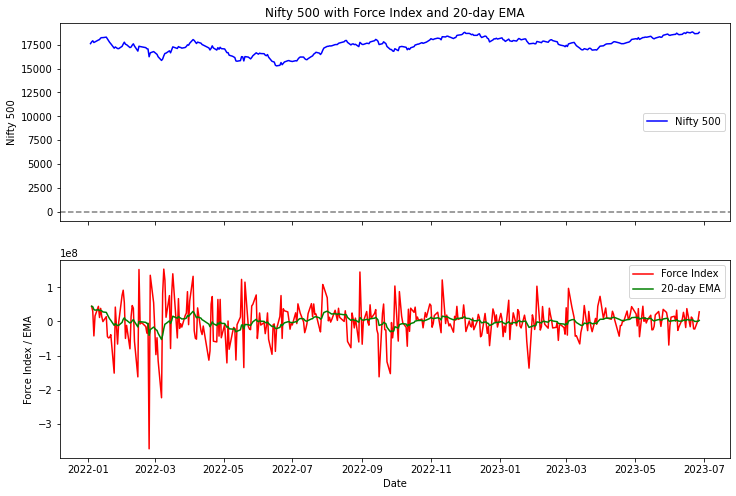

In [176]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_force_index(prices, volumes, n):
    # Convert input data to pandas Series if not already
    prices = pd.Series(prices)
    volumes = pd.Series(volumes)

    # Calculate price change
    price_change = prices.diff()

    # Calculate Force Index
    force_index = price_change * volumes

    # Calculate EMA
    ema_2 = force_index.ewm(span=2, adjust=False).mean()
    ema_20 = force_index.ewm(span=20, adjust=False).mean()

    # Concatenate Series objects with aligned indices
    df = pd.concat([force_index, ema_2, ema_20], axis=1)
    df.columns = ['Force Index', '2-day EMA', '20-day EMA']
    df = df.dropna()
    return df

nifty500_data = yf.download('^NSEI', start='2022-01-01', end='2023-06-30')


closing_prices = nifty500_data['Close']
volumes = nifty500_data['Volume']


df_force_index = calculate_force_index(closing_prices, volumes, 1)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax1.plot(nifty500_data.index, nifty500_data['Close'], color='blue', label='Nifty 500')
ax1.set_ylabel('Nifty 500')
ax2.plot(df_force_index.index, df_force_index['Force Index'], color='red', label='Force Index')
ax2.plot(df_force_index.index, df_force_index['20-day EMA'], color='green', label='20-day EMA')
ax2.set_ylabel('Force Index / EMA')

ax1.axhline(0, color='gray', linestyle='--')
ax1.set_title('Nifty 500 with Force Index and 20-day EMA')

ax1.legend()
ax2.legend()

plt.xlabel('Date')
plt.show()

[*********************100%***********************]  1 of 1 completed


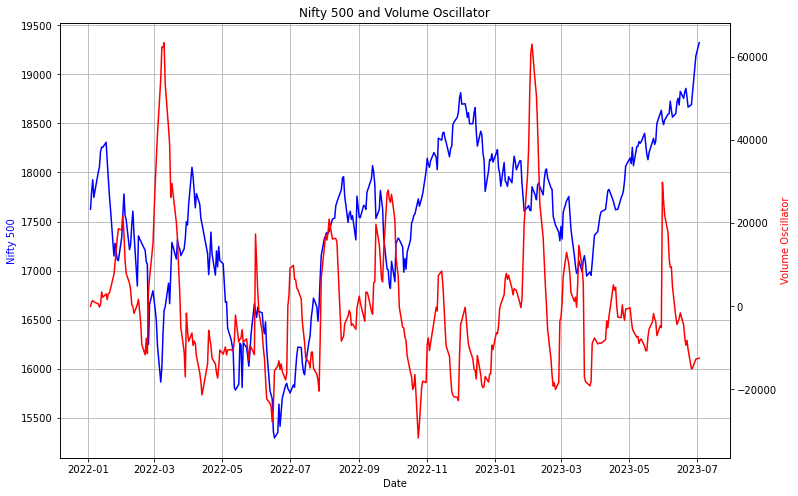

In [177]:
def calculate_volume_oscillator(symbol):
    data = yf.download(symbol, start='2022-01-01', end='2023-07-04')

    # Calculate the 14-day and 34-day EMAs of volume
    data['14-day EMA'] = data['Volume'].ewm(span=14).mean()
    data['34-day EMA'] = data['Volume'].ewm(span=34).mean()

    # Calculate the difference and ratio of the EMAs
    data['Volume Oscillator'] = data['14-day EMA'] - data['34-day EMA']
    data['Volume Oscillator Ratio'] = data['14-day EMA'] / data['34-day EMA']

    # Drop NaN values
    data = data.dropna()

    return data[['Close', 'Volume Oscillator', 'Volume Oscillator Ratio']]

nifty500 = '^NSEI'  # Symbol for Nifty 500 index
result = calculate_volume_oscillator(nifty500)

fig, ax1 = plt.subplots(figsize=(12, 8))

# Top pane: Nifty 500
ax1.plot(result.index, result['Close'], color='blue')
ax1.set_ylabel('Nifty 500', color='blue')

# Bottom pane: Volume Oscillator
ax2 = ax1.twinx()
ax2.plot(result.index, result['Volume Oscillator'], color='red')
ax2.set_ylabel('Volume Oscillator', color='red')

# Adjust plot aesthetics
ax1.set_title('Nifty 500 and Volume Oscillator')
ax1.set_xlabel('Date')
ax1.grid(True)

# Show the plot
plt.show()

[*********************100%***********************]  1 of 1 completed


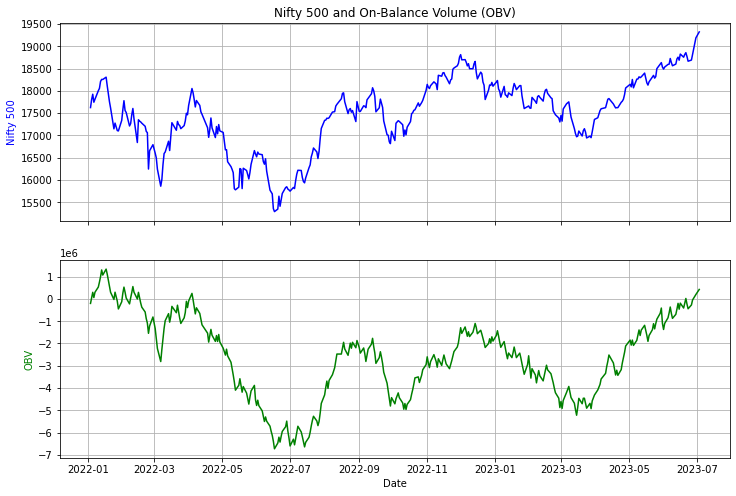

In [178]:
def calculate_obv(symbol):
    # Fetch historical data from yfinance
    data = yf.download(symbol, start='2022-01-01', end='2023-07-04')

    # Calculate the On-Balance Volume (OBV)
    data['OBV'] = pd.Series(data['Close'].diff().fillna(0).apply(lambda x: 1 if x > 0 else -1) * data['Volume']).cumsum()

    return data[['Close', 'OBV']]

# Example usage for Nifty 500
nifty500 = '^NSEI'  # Symbol for Nifty 500 index
result = calculate_obv(nifty500)

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Top pane: Nifty 500
ax1.plot(result.index, result['Close'], color='blue')
ax1.set_ylabel('Nifty 500', color='blue')

# Bottom pane: OBV
ax2.plot(result.index, result['OBV'], color='green')
ax2.set_ylabel('OBV', color='green')

# Adjust plot aesthetics
ax1.set_title('Nifty 500 and On-Balance Volume (OBV)')
ax2.set_xlabel('Date')
ax1.grid(True)
ax2.grid(True)

# Show the plot
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


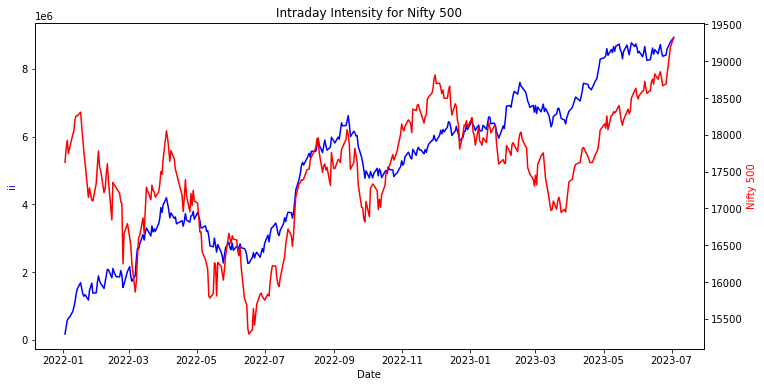

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

def calculate_intradayintensity(symbol):
    # Fetch historical data from yfinance
    data = yf.download(symbol, start='2022-01-01', end='2023-07-04')

    # Calculate the intradayintensity
    iit = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low'])
    
    # Calculate the intradayintensity Volume (MFV)
    ii = iit * data['Volume']
    
    # Calculate the intradayintensity
    ii = ii.cumsum()

    return ii

# Example usage for Nifty 500
nifty500 = '^NSEI'  # Symbol for Nifty 500 index
ii = calculate_intradayintensity(nifty500)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot Nifty 500
ax1.plot(ii.index, ii, color='blue')
ax1.set_ylabel('ii', color='blue')

# Fetch historical data again for plotting Nifty 500
data = yf.download(nifty500, start='2022-01-01', end='2023-07-04')
ax2.plot(data.index, data['Close'], color='red')
ax2.set_ylabel('Nifty 500', color='red')

ax1.set_title('Intraday Intensity for Nifty 500')
ax1.set_xlabel('Date')

plt.show()
